# Graph Visualization and Model Persistence with TensorFlow

In [7]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import os

## Import MNIST data

In [8]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Create dir to save the model

In [9]:
ckpt_dir = '/tmp/tensorflow_ckpt'

In [10]:
if not os.path.exists(ckpt_dir):
    os.mkdir(ckpt_dir)

## Parameters

In [11]:
learning_rate = 0.01
training_epochs = 10
batch_size = 100
display_step = 1

## tf Graph input

In [12]:
x = tf.placeholder(tf.float32, [None, 784], name='x') # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10], name='y') # 0-9 digits recognition => 10 classes

## Create model

### Set model weights and bias

In [13]:
W = tf.Variable(tf.random_normal([784, 10]), name='weights')
b = tf.Variable(tf.zeros([10]), name='bias')

### Construct the model

In [14]:
activation = tf.nn.softmax(tf.nn.bias_add(tf.matmul(x, W), b))

### Minimize error using cross entropy

In [15]:
cost = - tf.reduce_sum(y*tf.log(activation))

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Define global step
(so that it is also saved)

In [17]:
global_step = tf.Variable(0, name='global_step', trainable=False)

## Define saver (only after defining all variables)

In [19]:
saver = tf.train.Saver()

Just to exemplify, the following variable is not saved:

In [20]:
non_storable_variable = tf.Variable(777)

## Initialize the Variables

In [21]:
init = tf.initialize_all_variables()

## Launch the Graph

In [23]:
with tf.Session() as sess:
    sess.run(init)
    
    # check if there is already a saved model
    ckpt = tf.train.get_checkpoint_state(ckpt_dir)
    if ckpt and ckpt.model_checkpoint_path:
        print(ckpt.model_checkpoint_path)
        saver.restore(sess, ckpt.model_checkpoint_path) # restore all variables
        
    # get last global step
    start = global_step.eval()
    print("Start from {}".format(start))
    
    # Set logs into folder /tmp/tensorflow_logs
    summary_writter = tf.train.SummaryWriter('/tmp/tensorflow_logs', graph=sess.graph)
    
    # Training cycle
    for epoch in range(start, training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training_using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            #Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
            
        # Save model at each epoch
        global_step.assign(epoch).eval()
        saver.save(sess, ckpt_dir + '/model.ckpt', global_step=global_step)
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch: {:04d}, cost= {:.9f}".format(epoch+1, avg_cost))
            
    print("Optimization Finished!")
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    test_acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
    print("Accuracy: {}".format(test_acc))

/tmp/tensorflow_ckpt/model.ckpt-3
Start from 3
Epoch: 0004, cost= 27.200876341
Epoch: 0005, cost= 26.935328419
Epoch: 0006, cost= 24.695478929
Epoch: 0007, cost= 23.863998778
Epoch: 0008, cost= 23.569371856
Epoch: 0009, cost= 22.660827687
Epoch: 0010, cost= 22.631084634
Optimization Finished!
Accuracy: 0.913100004196167


## Run in the command line
    tensorboard --logdir=/tmp/tensorflow_logs

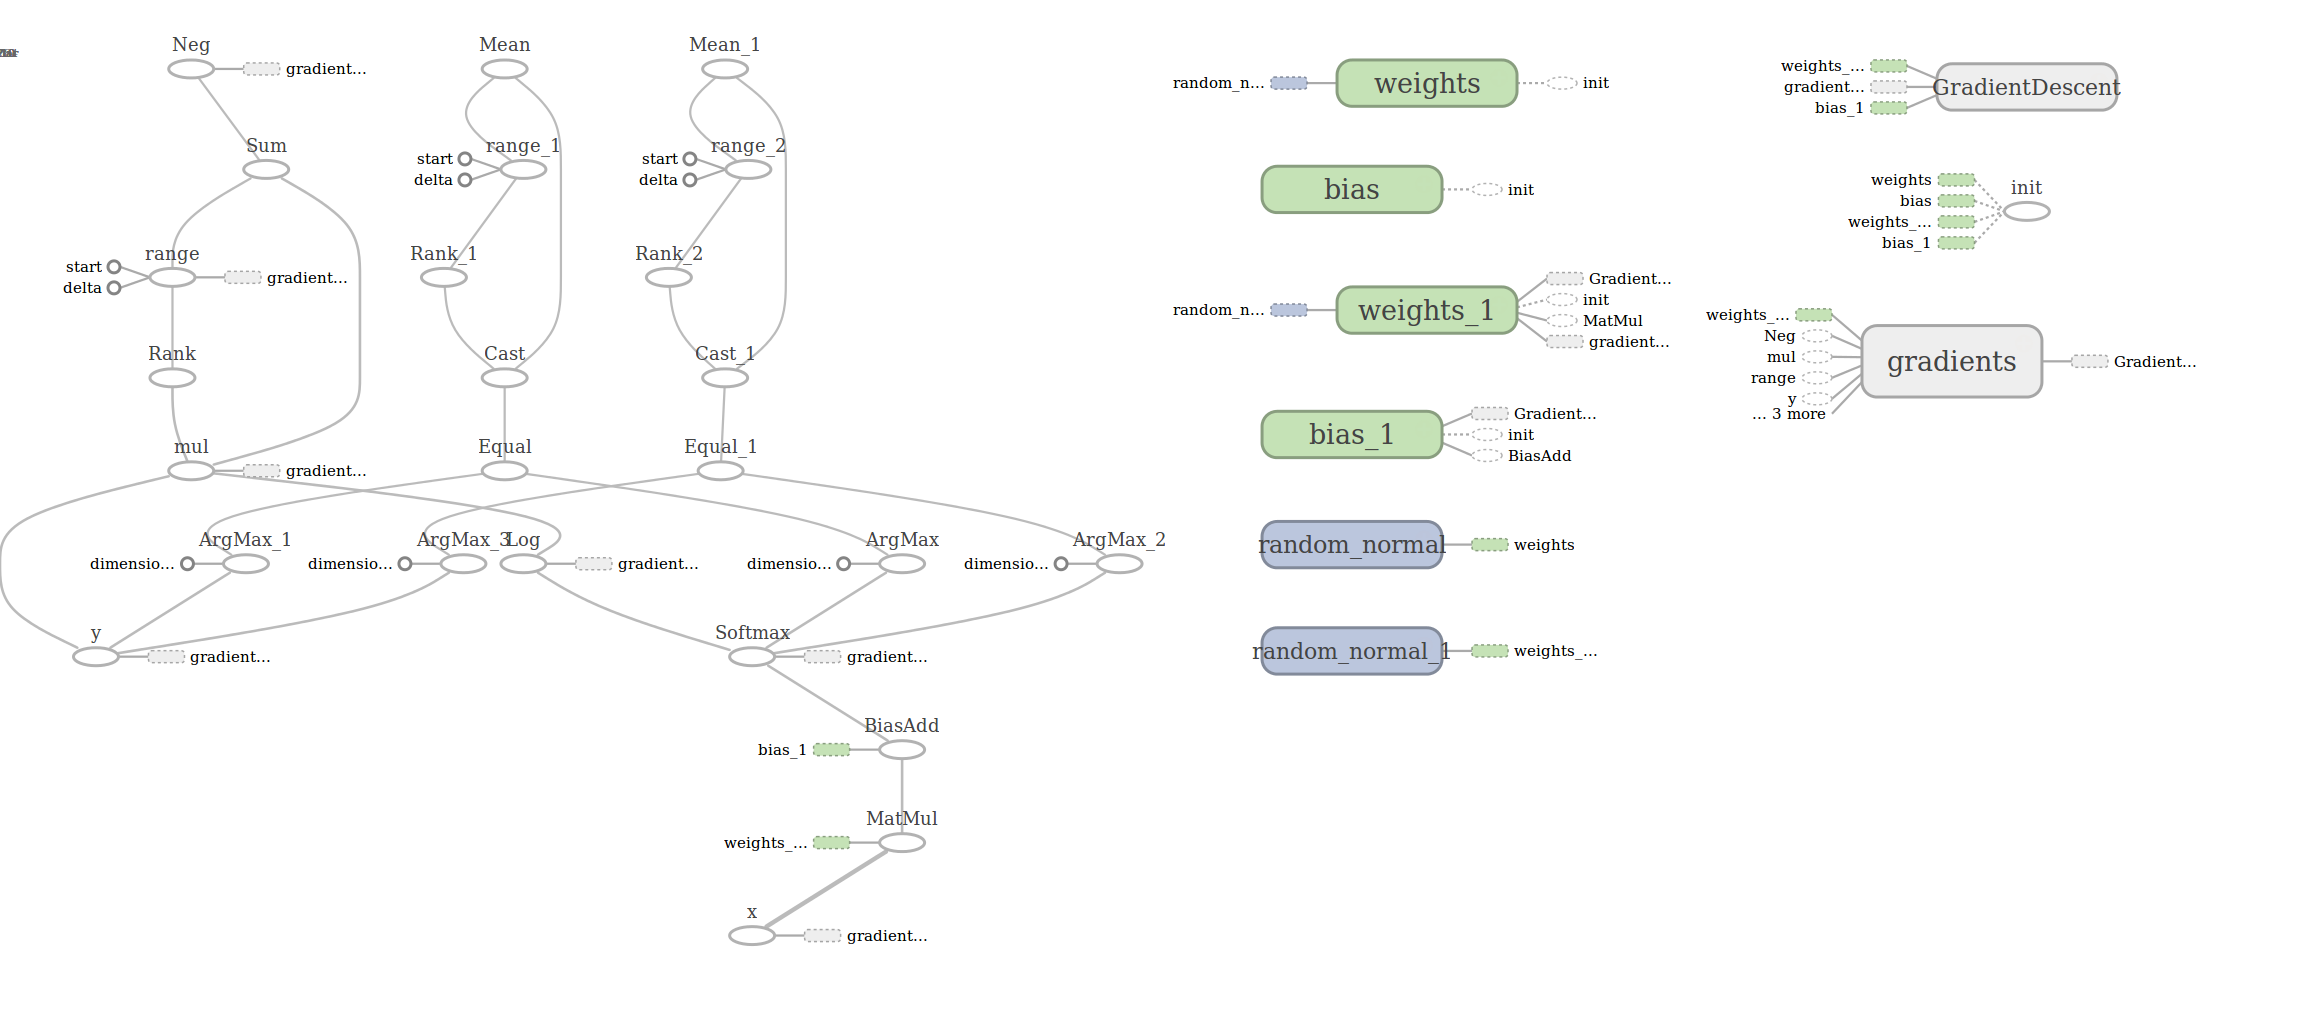

In [24]:
from IPython.display import Image

Image('graph.png')